#### Import libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read TSV files

In [2]:
df_train = pd.read_csv('data/train.tsv', sep='\t', low_memory=True)
print(df_train.shape)
print(df_train.info())
display(df_train.head())

(1482535, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482529 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
df_test = pd.read_csv('data/test.tsv', sep='\t', low_memory=True)
print(df_test.shape)
print(df_test.info())
display(df_test.head())

(693359, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   test_id            693359 non-null  int64 
 1   name               693359 non-null  object
 2   item_condition_id  693359 non-null  int64 
 3   category_name      690301 non-null  object
 4   brand_name         397834 non-null  object
 5   shipping           693359 non-null  int64 
 6   item_description   693359 non-null  object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB
None


,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


#### Count the number of words in the product name and product description

In [4]:
def wordCount(text):
    """
    Parameters:
      text(str): 商品名、商品の説明文
    """
    try:
        if text == 'No description yet':
            return 0  # 商品名や説明が'No description yet'の場合は0を返す
        else:
            text = text.lower()                  # すべて小文字にする
            words = [w for w in text.split(" ")] # スペースで切り分ける
            return len(words)                    # 単語の数を返す
    except: 
        return 0

# 'name'の各フィールドの単語数を'name_len'に登録
df_train['name_len'] = df_train['name'].apply(lambda x: wordCount(x))
df_test['name_len'] = df_test['name'].apply(lambda x: wordCount(x))
# 'item_description'の各フィールドの単語数を'desc_len'に登録
df_train['desc_len'] = df_train['item_description'].apply(lambda x: wordCount(x))
df_test['desc_len'] = df_test['item_description'].apply(lambda x: wordCount(x))

In [5]:
display(df_train.head())

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,name_len,desc_len
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,7,0
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,4,36
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2,29
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3,32
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,4,5


In [6]:
display(df_test.head())

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,name_len,desc_len
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,8,2
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",7,38
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,2,11
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,2,10
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,3,29


#### Take a look at the 'price'

In [15]:
df_train['price'].describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

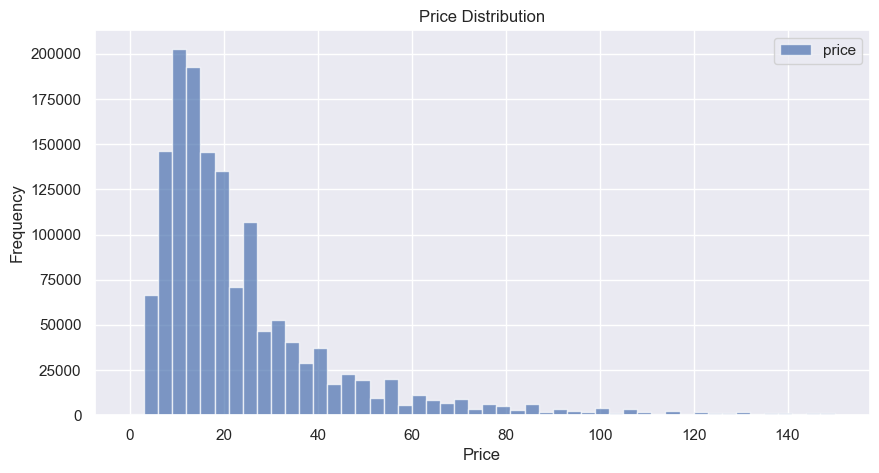

In [18]:
#priceをヒストグラムで表示
sns.set()
plt.figure(figsize=(10, 5))
plt.hist(df_train['price'], bins=50, range=[0, 150], alpha=0.7, color='b', label='price')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()

#### Scaling the selling price

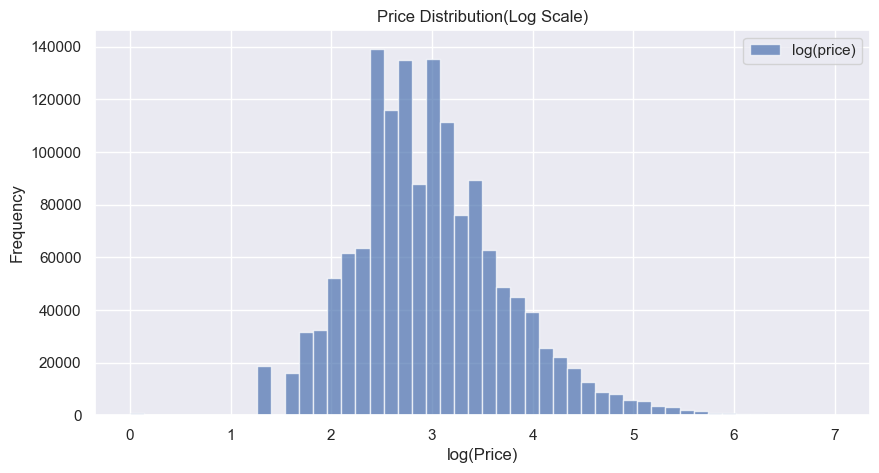

In [19]:
# 訓練データの'price'を対数変換する
df_train["target"] = np.log1p(df_train.price)
# ヒストグラムを表示
plt.figure(figsize=(10, 5))
plt.hist(df_train["target"], bins=50, range=[0, 7], alpha=0.7, color='b', label='price')
plt.title('Price Distribution(Log Scale)')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.legend(['log(price)'])

#### Splitting the category name and registering it in a new column

In [10]:
def split_cat(text):
    """
    Parameters:
      text(str): カテゴリ名

    ・カテゴリを/で切り分ける
    ・データが存在しない場合は"No Label"を返す
    """
    try: return text.split("/")
    except: return ("No Label", "No Label", "No Label")

# 3つに切り分けたカテゴリ名を'subcat_0'、'subcat_1'、'subcat_2'に登録
# 訓練データ
df_train['subcat_0'], df_train['subcat_1'], df_train['subcat_2'] = \
    zip(*df_train['category_name'].apply(lambda x: split_cat(x)))
# テストデータ
df_test['subcat_0'], df_test['subcat_1'], df_test['subcat_2'] = \
    zip(*df_test['category_name'].apply(lambda x: split_cat(x)))

In [11]:
display(df_train.head())

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,name_len,desc_len,target,subcat_0,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,7,0,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,4,36,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2,29,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,3,32,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,4,5,3.806662,Women,Jewelry,Necklaces


In [12]:
display(df_test.head())

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,name_len,desc_len,subcat_0,subcat_1,subcat_2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7,8,2,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",7,38,Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,2,11,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...,2,10,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...,3,29,Other,Books,Religion & Spirituality


#### Replace the missing values of the brand name with meaningful data

In [13]:
# df_trainとdf_testを縦方向に結合
full_set = pd.concat([df_train, df_test])
# full_setの'brand_name'から重複なしのブランドリスト(集合)を生成
all_brands = set(full_set['brand_name'].values)

# 'brand_name'の欠損値NaNを'missing'に置き換える
df_train['brand_name'].fillna(value='missing', inplace=True)
df_test['brand_name'].fillna(value='missing', inplace=True)

# 訓練データの'brand_name'が'missing'に一致するレコード数を取得
train_premissing = len(df_train.loc[df_train['brand_name'] == 'missing'])
# テストデータの'brand_name'が'missing'に一致するレコード数を取得
test_premissing = len(df_test.loc[df_test['brand_name'] == 'missing'])

def brandfinder(line):
    """
    Parameters: line(str): ブランド名

    ・ブランド名の'missing'を商品名に置き換える:
         missing'の商品名の単語がブランドリストに存在する場合
    ・ブランド名を商品名に置き換える:
        商品名がブランドリストの名前と完全に一致する場合
    ・ブランド名をそのままにする:
        商品名がブランドリストの名前と一致しない
        商品名が'missing'だが商品名の単語がブランドリストにない
    """
    brand = line[0] # 第1要素はブランド名
    name = line[1]  # 第2要素は商品名
    namesplit = name.split(' ') # 商品名をスペースで切り分ける
    
    if brand == 'missing':  # ブランド名が'missing'と一致
        for x in namesplit: # 商品名から切り分けた単語を取り出す
            if x in all_brands:                
                return name # 単語がブランドリストに一致したら商品名を返す
    if name in all_brands:  # 商品名がブランドリストに存在すれば商品名を返す
        return name
    
    return brand            # どれにも一致しなければブランド名を返す

# ブランド名の付替えを実施
df_train['brand_name'] = df_train[['brand_name','name']].apply(brandfinder, axis = 1)
df_test['brand_name'] = df_test[['brand_name','name']].apply(brandfinder, axis = 1)

# 書き換えられた'missing'の数を取得
train_found = train_premissing-len(df_train.loc[df_train['brand_name'] == 'missing'])
test_found = test_premissing-len(df_test.loc[df_test['brand_name'] == 'missing'])
print(train_premissing) # 書き換える前の'missing'の数
print(train_found)      # 書き換えられた'missing'の数
print(test_premissing)  # 書き換える前の'missing'の数
print(test_found)       # 書き換えられた'missing'の数

C:\Users\harut\AppData\Local\Temp\ipykernel_5916\2567032386.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['brand_name'].fillna(value='missing', inplace=True)
C:\Users\harut\AppData\Local\Temp\ipykernel_5916\2567032386.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

632682
137418
295525
64154


In [14]:
display(df_train.head())

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,name_len,desc_len,target,subcat_0,subcat_1,subcat_2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,MLB Cincinnati Reds T Shirt Size XL,10.0,1,No description yet,7,0,2.397895,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,4,36,3.970292,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,2,29,2.397895,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,missing,35.0,1,New with tags. Leather horses. Retail for [rm]...,3,32,3.583519,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,missing,44.0,0,Complete with certificate of authenticity,4,5,3.806662,Women,Jewelry,Necklaces
